In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from statsmodels.tsa.api import SimpleExpSmoothing as SES
# from statsmodels.tsa.api import Holt 
# from statsmodels.tsa.stattools import acf

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Example 4.1 : 분해법

In [3]:
# =================
# Data Load
# =================

raw_data = pd.read_csv("D:\금융시계열분석세미나\제5판_시계열분석_프로그램\제5판 시계열분석 data/food.txt",
            sep=' ', names=list(range(13)), skipinitialspace=True)
raw_data_ary = np.array(raw_data).flatten()
raw_data_ary = raw_data_ary[~np.isnan(raw_data_ary)]

In [4]:
#관측치 데이터
food = pd.DataFrame({'Data' : raw_data_ary},
                      index=pd.date_range(start='1980-01', freq='M', periods=len(raw_data_ary)) )

t = sm.add_constant(range(len(food))) # 절편이 포함된 추세항으로 회귀분석을 진행하기위해

model = sm.OLS(food, t) 
fit1 = model.fit()
trend = fit1.fittedvalues

C:\Users\shb52\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


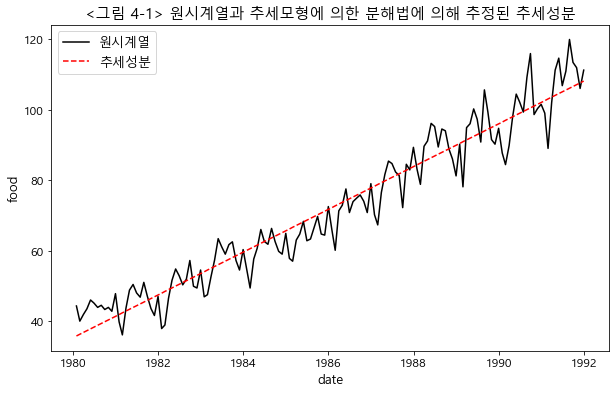

In [5]:
plt.figure(figsize=(10,6))
plt.plot(food, color='k')
plt.plot(trend, color='r', linestyle='--')
plt.xlabel('date', fontsize=13)
plt.ylabel('food', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 4-1> 원시계열과 추세모형에 의한 분해법에 의해 추정된 추세성분', fontsize=15)
plt.legend(['원시계열', '추세성분'], fontsize=13, loc='upper left')
plt.show()

In [6]:
adjtrend = (food.T/trend).T #승법모형에서 추세성분 제거

In [7]:
# 계절성분의 추정계열 생성
y = pd.DataFrame(np.zeros((len(adjtrend),12)), index=adjtrend.index, columns=list(range(1,13)))
for i in y.columns.values:
    for j in y.index:
        if i == j.month:
            y.loc[j,i] = 1
        else:
            y.loc[j,i] = 0

In [8]:
y

,1,2,3,4,5,6,7,8,9,10,11,12
1980-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-02-29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-03-31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-04-30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-05-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1991-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1991-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1991-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1991-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
model2 = sm.tsa.ARIMA(adjtrend, [2,0,0], exog=y) #외생변수로 계절성분의 추정계열을 넣어준다. 
fit2 = model2.fit(trend='nc')
fit2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 -416.5181 
Dependent Variable: Data             Log-Likelihood:      245.53    
Date:               2020-02-17 20:28 Scale:               1.0000    
No. Observations:   144              Method:              css-mle   
Df Model:           14               Sample:              01-31-1980
Df Residuals:       130                                   12-31-1991
Converged:          1.0000           S.D. of innovations: 0.044     
No. Iterations:     42.0000          HQIC:                -442.964  
AIC:                -461.0653                                       
----------------------------------------------------------------------
                Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
----------------------------------------------------------------------
1               0.9505     0.0298   31.8854   0.0000   0.8921   1.0089
2               0.8851     0.0300   29.4876   0.0000   0.8263   0.9439
3               1.0012     0.0303   33.0963   0.0000   0.9419   1.0605
4               1.0535     0.0304   34.6314   0.0000   0.9939   1.1131
5               1.1071     0.0306   36.2218   0.0000   1.0472   1.1670
6               1.0560     0.0307   34.4414   0.0000   0.9959   1.1161
7               1.0276     0.0307   33.4528   0.0000   0.9674   1.0878
8               1.0802     0.0307   35.1648   0.0000   1.0200   1.1404
9               1.0595     0.0307   34.5511   0.0000   0.9994   1.1196
10              1.0033     0.0305   32.8566   0.0000   0.9434   1.0631
11              0.9751     0.0303   32.1507   0.0000   0.9156   1.0345
12              1.0418     0.0301   34.6372   0.0000   0.9829   1.1008
ar.L1.Data      0.5396     0.0808    6.6806   0.0000   0.3813   0.6979
ar.L2.Data      0.3316     0.0849    3.9043   0.0002   0.1651   0.4981
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.1041             0.0000           1.1041             0.0000
AR.2           -2.7313             0.0000           2.7313             0.5000
====================================================================

"""

In [53]:
model2 = sm.tsa.ARIMA(adjtrend, [0,0,2], exog=y) #외생변수로 계절성분의 추정계열을 넣어준다. 
fit2 = model2.fit(trend='nc')
fit2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 -384.6703 
Dependent Variable: Data             Log-Likelihood:      229.61    
Date:               2020-02-17 20:28 Scale:               1.0000    
No. Observations:   144              Method:              css-mle   
Df Model:           14               Sample:              01-31-1980
Df Residuals:       130                                   12-31-1991
Converged:          1.0000           S.D. of innovations: 0.049     
No. Iterations:     35.0000          HQIC:                -411.116  
AIC:                -429.2175                                       
----------------------------------------------------------------------
                Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
----------------------------------------------------------------------
1               0.9403     0.0171   54.8308   0.0000   0.9067   0.9739
2               0.8743     0.0173   50.5512   0.0000   0.8404   0.9082
3               0.9901     0.0174   57.0099   0.0000   0.9561   1.0242
4               1.0412     0.0174   59.9531   0.0000   1.0072   1.0753
5               1.0934     0.0174   62.9567   0.0000   1.0594   1.1274
6               1.0408     0.0174   59.9302   0.0000   1.0068   1.0749
7               1.0107     0.0174   58.1946   0.0000   0.9767   1.0447
8               1.0615     0.0174   61.1195   0.0000   1.0274   1.0955
9               1.0387     0.0174   59.8068   0.0000   1.0047   1.0727
10              0.9804     0.0174   56.4532   0.0000   0.9464   1.0145
11              0.9555     0.0173   55.1900   0.0000   0.9215   0.9894
12              1.0281     0.0172   59.8683   0.0000   0.9944   1.0617
ma.L1.Data      0.5779     0.0806    7.1664   0.0000   0.4198   0.7359
ma.L2.Data      0.4146     0.0693    5.9841   0.0000   0.2788   0.5504
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
MA.1           -0.6969            -1.3879           1.5530            -0.3241
MA.2           -0.6969             1.3879           1.5530             0.3241
====================================================================

"""

In [10]:
seasonal = fit2.fittedvalues

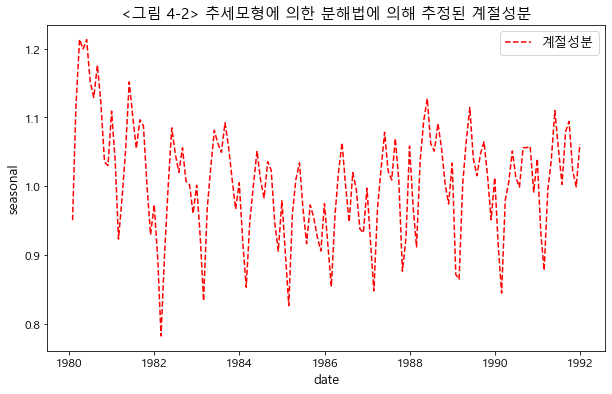

In [11]:
plt.figure(figsize=(10,6))
plt.plot(seasonal, color='r', linestyle='--')
plt.xlabel('date', fontsize=13)
plt.ylabel('seasonal', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['계절성분'], fontsize=13, loc='upper right')
plt.title('<그림 4-2> 추세모형에 의한 분해법에 의해 추정된 계절성분', fontsize=15)
plt.show()

In [12]:
pred = trend * seasonal #승법 모형의 예측값
irregular = (food.T/pred).T #불규칙성분

In [69]:
table4_3 = pd.concat((pd.concat((pd.concat((pd.concat((food, trend),axis=1), seasonal), axis=1), irregular), axis=1), pred), axis=1)
table4_3.columns = ['Z', '추세성분', '계절성분', '불규칙성분', 'Z_hat']
table4_3

,Z,추세성분,계절성분,불규칙성분,Z_hat
1980-01-31,44.3,35.791715,0.950489,1.302189,34.019636
1980-02-29,40.0,36.297289,1.116975,0.986603,40.543154
1980-03-31,41.9,36.802863,1.213471,0.938217,44.659200
1980-04-30,43.5,37.308437,1.199552,0.971993,44.753402
1980-05-31,46.0,37.814012,1.213293,1.002627,45.879464
...,...,...,...,...,...
1991-08-31,119.9,106.066544,1.079524,1.047149,114.501329
1991-09-30,113.4,106.572118,1.094198,0.972464,116.610979
1991-10-31,111.9,107.077692,1.022439,1.022101,109.480396
1991-11-30,106.0,107.583267,0.999138,0.986133,107.490571


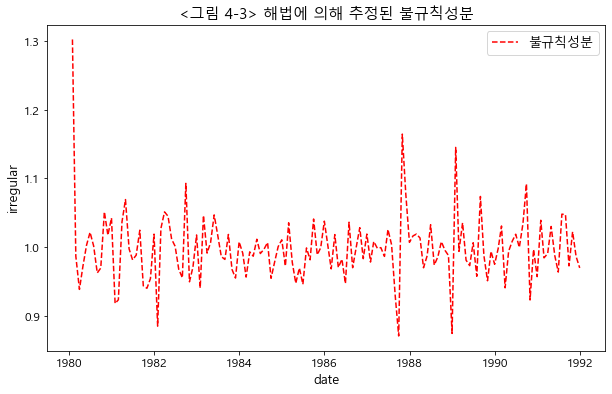

In [13]:
plt.figure(figsize=(10,6))
plt.plot(irregular, color='r', linestyle='--')
plt.xlabel('date', fontsize=13)
plt.ylabel('irregular', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['불규칙성분'], fontsize=13, loc='upper right')
plt.title('<그림 4-3> 해법에 의해 추정된 불규칙성분', fontsize=15)
plt.show()

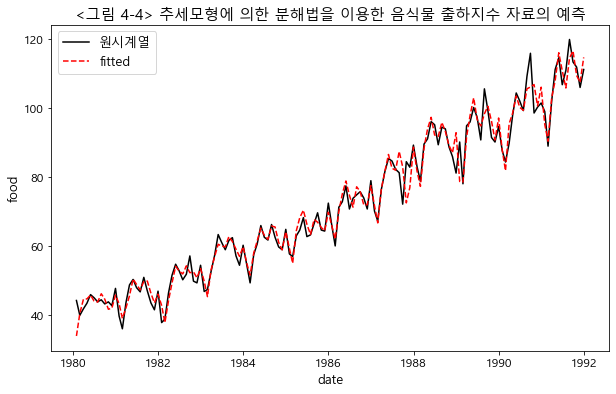

In [14]:
plt.figure(figsize=(10,6))
plt.plot(food, color='k')
plt.plot(pred, color='r', linestyle='--')
plt.xlabel('date', fontsize=13)
plt.ylabel('food', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 4-4> 추세모형에 의한 분해법을 이용한 음식물 출하지수 자료의 예측', fontsize=15)
plt.legend(['원시계열', 'fitted'], fontsize=13, loc='upper left')
plt.show()

# Example 4.2 : 이동평균법

In [15]:
# =================
# Data Load
# =================

raw_data = pd.read_csv("D:\금융시계열분석세미나\제5판_시계열분석_프로그램\제5판 시계열분석 data/mindex.txt",
            sep=' ', names=list(range(13)), skipinitialspace=True)
raw_data_ary = np.array(raw_data).flatten()
raw_data_ary = raw_data_ary[~np.isnan(raw_data_ary)]

In [16]:
#관측치 데이터
index = pd.DataFrame({'Data' : raw_data_ary},
                      index=pd.date_range(start='1986-01', freq='M', periods=len(raw_data_ary)) )

In [17]:
m3 = index.rolling(window=3, center=True).mean() #center=True 이면 중심이동평균, window는 ma항의 갯수
m3.head(7)

,Data
1986-01-31,NaN
1986-02-28,11.100000
1986-03-31,12.700000
1986-04-30,15.066667
1986-05-31,16.666667
1986-06-30,18.433333
1986-07-31,18.766667


In [18]:
m7 = index.rolling(window=7, center=True).mean()
m7.head(7)

,Data
1986-01-31,NaN
1986-02-28,NaN
1986-03-31,NaN
1986-04-30,14.671429
1986-05-31,16.028571
1986-06-30,17.228571
1986-07-31,17.957143


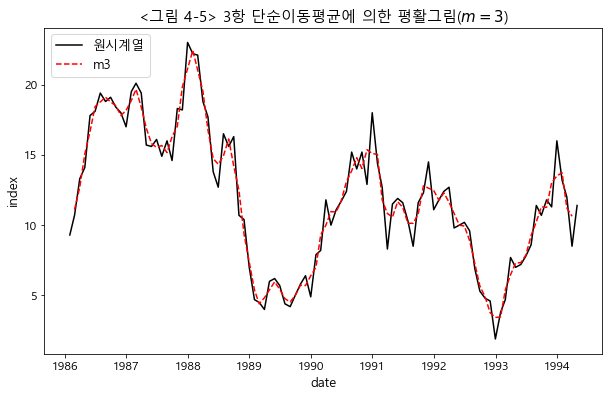

In [19]:
plt.figure(figsize=(10,6))
plt.plot(index, color='k')
plt.plot(m3, color='r', linestyle='--')
plt.xlabel('date', fontsize=13)
plt.ylabel('index', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 4-5> 3항 단순이동평균에 의한 평활그림($ m = 3 $)', fontsize=15)
plt.legend(['원시계열', 'm3'], fontsize=13, loc='upper left')
plt.show()

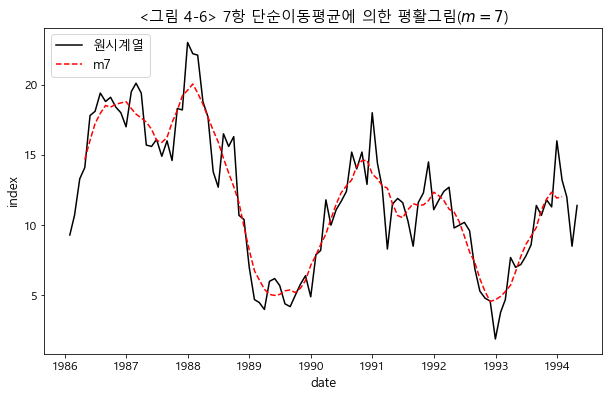

In [20]:
plt.figure(figsize=(10,6))
plt.plot(index, color='k')
plt.plot(m7, color='r', linestyle='--')
plt.xlabel('date', fontsize=13)
plt.ylabel('index', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 4-6> 7항 단순이동평균에 의한 평활그림($ m = 7 $)', fontsize=15)
plt.legend(['원시계열', 'm7'], fontsize=13, loc='upper left')
plt.show()

# Example 4.3 : 이동평균법을 이용한 계절조정

In [21]:
# =================
# Data Load
# =================

raw_data = pd.read_csv("D:\금융시계열분석세미나\제5판_시계열분석_프로그램\제5판 시계열분석 data/food.txt",
            sep=' ', names=list(range(13)), skipinitialspace=True)
raw_data_ary = np.array(raw_data).flatten()
raw_data_ary = raw_data_ary[~np.isnan(raw_data_ary)]

In [22]:
#관측치 데이터
food = pd.DataFrame({'Data' : raw_data_ary},
                      index=pd.date_range(start='1980-01', freq='M', periods=len(raw_data_ary)) )

In [110]:
trend_m12 = food.rolling(window=12, center=True).mean() # m=12, 중심이동평균으로 추세선생성

In [111]:
trend_m12.head(12)

,Data
1980-01-31,NaN
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
1980-06-30,NaN
1980-07-31,43.916667
1980-08-31,43.541667
1980-09-30,43.216667
1980-10-31,43.366667


In [24]:
adjtrend2 = (food.T - trend_m12.T).T # 가법모형을 가정한다하여 추세모형을 원시계열에 빼줌으로써 추세조정 시계열 생성

In [25]:
adjtrend2.head(20)

,Data
1980-01-31,NaN
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
1980-06-30,NaN
1980-07-31,-0.016667
1980-08-31,0.958333
1980-09-30,0.083333
1980-10-31,0.533333


In [26]:
y = pd.DataFrame(np.zeros((len(adjtrend2),12)), index=adjtrend.index, columns=list(range(1,13)))
for i in y.columns.values:
    for j in y.index:
        if i == j.month:
            y.loc[j,i] = 1
        else:
            y.loc[j,i] = 0

In [27]:
y

,1,2,3,4,5,6,7,8,9,10,11,12
1980-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-02-29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-03-31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-04-30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-05-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1991-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1991-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1991-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1991-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
model3 = sm.tsa.ARIMA(adjtrend2.dropna(), [0,0,0], exog=y.loc[y.index.intersection(adjtrend2.dropna().index), :])
fit3 = model3.fit(trend='nc')
fit3.summary()

# OLS로 했을경우도 동일함
# model3 = sm.OLS(adjtrend2.dropna(), exog=y.loc[y.index.intersection(adjtrend2.dropna().index), :])
# fit3 = model3.fit()
# fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Data   No. Observations:                  133
Model:                     ARMA(0, 0)   Log Likelihood                -324.004
Method:                           css   S.D. of innovations              2.765
Date:                Mon, 17 Feb 2020   AIC                            674.007
Time:                        15:53:06   BIC                            711.582
Sample:                    07-31-1980   HQIC                           689.276
                         - 07-31-1991                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
1             -4.7674      0.834     -5.718      0.000      -6.402      -3.133
2             -9.4932      0.834    -11.386      0.000     -11.127      -7.859
3             -0.8826      0.834     -1.059      0.292      -2.517       0.752
4              2.7864      0.834      3.342      0.001       1.152       4.421
5              6.5712      0.834      7.881      0.000       4.937       8.205
6              2.7470      0.834      3.295      0.001       1.113       4.381
7              0.7014      0.798      0.879      0.381      -0.863       2.266
8              4.3227      0.834      5.184      0.000       2.689       5.957
9              3.2424      0.834      3.889      0.000       1.608       4.877
10            -1.1311      0.834     -1.357      0.177      -2.765       0.503
11            -2.9712      0.834     -3.563      0.001      -4.605      -1.337
12             1.1273      0.834      1.352      0.179      -0.507       2.761
==============================================================================
"""

In [30]:
seasonal2 = fit3.fittedvalues

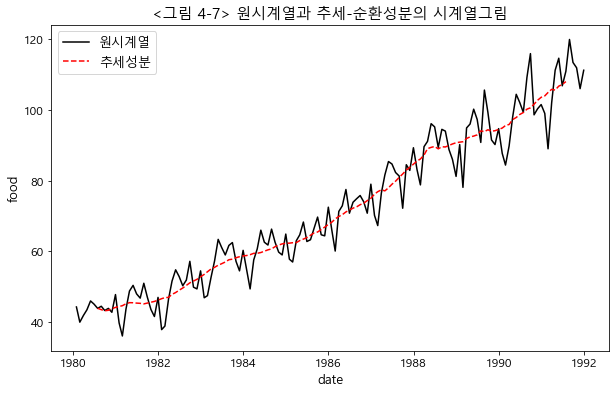

In [31]:
plt.figure(figsize=(10,6))
plt.plot(food, color='k')
plt.plot(trend_m12, color='r', linestyle='--')
plt.xlabel('date', fontsize=13)
plt.ylabel('food', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 4-7> 원시계열과 추세-순환성분의 시계열그림', fontsize=15) #순환성분은 안들어감
plt.legend(['원시계열', '추세성분'], fontsize=13, loc='upper left')
plt.show()

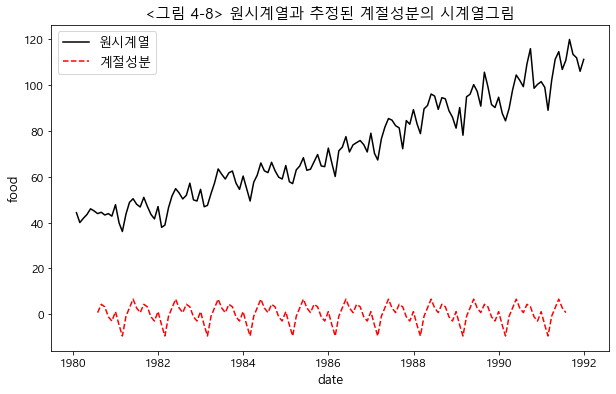

In [32]:
plt.figure(figsize=(10,6))
plt.plot(food, color='k')
plt.plot(seasonal2, color='r', linestyle='--')
plt.xlabel('date', fontsize=13)
plt.ylabel('food', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['원시계열', '계절성분'], fontsize=13, loc='upper left')
plt.title('<그림 4-8> 원시계열과 추정된 계절성분의 시계열그림', fontsize=15)
plt.show()

In [33]:
pred2 = (seasonal2.T + trend_m12.T).T

In [34]:
irregular2 = (food.T - seasonal2.T - trend_m12.T).T #불규칙성분

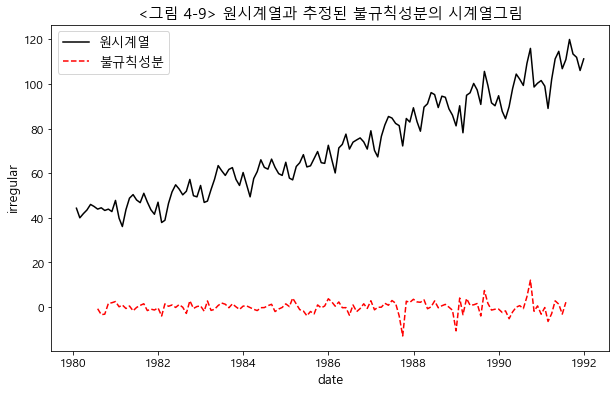

In [35]:
plt.figure(figsize=(10,6))
plt.plot(food, color='k')
plt.plot(irregular2, color='r', linestyle='--')
plt.xlabel('date', fontsize=13)
plt.ylabel('irregular', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['원시계열', '불규칙성분'], fontsize=13, loc='upper left')
plt.title('<그림 4-9> 원시계열과 추정된 불규칙성분의 시계열그림', fontsize=15)
plt.show()

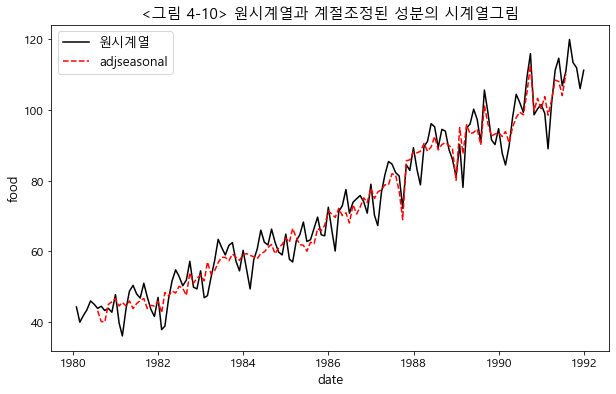

In [36]:
plt.figure(figsize=(10,6))
plt.plot(food, color='k')
plt.plot((food.T - seasonal2.T).T, color='r', linestyle='--')
plt.xlabel('date', fontsize=13)
plt.ylabel('food', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 4-10> 원시계열과 계절조정된 성분의 시계열그림', fontsize=15)
plt.legend(['원시계열', 'adjseasonal'], fontsize=13, loc='upper left')
plt.show()